# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [55]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

import warnings
warnings.filterwarnings('ignore')

In [250]:
# Read the Mapbox API key
load_dotenv('example.env')
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [28]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [239]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# sfo_avg_data = sfo_data.groupby('year')['housing_units'].mean()
sfo_avg_data_year = sfo_data.groupby(by ='year').mean()
sfo_avg_data_year.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [234]:
# Save the dataframe as a csv file
sfo_avg_data_year.to_csv('sfo_avg_data.csv')

In [237]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
minimum = 371000 
maximum = 383000
# ax = sfo_avg_data.plot(kind = 'bar', title = 'Housing Units - Y axix limits manually set').set_ylim([minimum,maximum])
ax1 = sfo_avg_data_year.hvplot.bar(x='year', y='housing_units', title = 'Housing Units yearly trend', ylim =(371000, 383000), xlabel='Year', ylabel ='Housing Units')
display(ax1)

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
minimum = sfo_avg_data_year['housing_units'].min() - sfo_avg_data['housing_units'].std()
maximum = sfo_avg_data_year['housing_units'].max() + sfo_avg_data['housing_units'].std()
ax2 = sfo_avg_data_year.hvplot.bar(x='year', y='housing_units', title = 'Housing Units yearly trend - Auto Min-Max', ylim =(minimum,maximum), xlabel='Year', ylabel ='Housing Units')
display(ax2)

:Bars   [year]   (housing_units)

:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [240]:
# Calculate the average sale price per square foot and average gross rent
# Mean calulated in above section
sfo_avg_data_year.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528


In [241]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
plot1 = sfo_avg_data_year['sale_price_sqr_foot'].hvplot(x='year', y='sale_price_sqr_foot', title = 'Aerage Sales Price per Sq Ft', label='Year', rot= 90, ylabel='Avg Sales Price')
display(plot1)

# Line chart for average montly rent
plot2 = sfo_avg_data_year['gross_rent'].hvplot(x='year', y='gross_rent', title = 'Avg Gross Rent by Year', label='Year', color= 'r', rot = 90, ylabel='Gross Rent')
display(plot2)

:Curve   [year]   (sale_price_sqr_foot)

:Curve   [year]   (gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [203]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_avg_neighbrohood_df = sfo_data.groupby(by=['year', 'neighborhood']).mean().reset_index()
sfo_avg_neighbrohood_df.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [163]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

# create data frame with slected neighborhood
def get_df(neighborhood): 
    df = sfo_avg_neighbrohood_df.loc[sfo_avg_neighbrohood_df['neighborhood'] == neighborhood ]
    return df

neighborhoods = sfo_avg_neighbrohood_df.neighborhood.unique()

# Define function to create plot
def plot_avg_price(neighborhood):
    df = get_df(neighborhood)

    return df.hvplot.line(
        x = "year",
        y = "sale_price_sqr_foot",
        title="Average Sales Price/SqFt Yearly Trend"
    )

# Render plot with Panel interactive widget
interact(plot_avg_price, neighborhood = neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive11097')

In [164]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# Define function to create plot
def plot_avg_price(neighborhood):
    df = get_df(neighborhood)

    return df.hvplot.line(
        x = "year",
        y = "gross_rent",
        title="Average Monthly Rent Yearly Trend",
        xlabel = 'Year', 
        ylabel = 'Gross Rent'
    )

# Render plot with Panel interactive widget
interact(plot_avg_price, neighborhood = neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive11283')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [245]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_neighborhood_df = sfo_avg_neighbrohood_df.groupby('neighborhood').mean().sort_values(by='sale_price_sqr_foot', ascending=False ).reset_index()
sfo_neighborhood_df.head(10)


,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,2012.500000,903.993258,377427.50,2555.166667
1,Merced Heights,2014.000000,788.844818,380348.00,3414.000000
2,Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
3,Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
4,Westwood Park,2015.000000,687.087575,382295.00,3959.000000
5,Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
6,Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
7,Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
8,Potrero Hill,2013.000000,662.013613,378401.00,2817.285714
9,South Beach,2011.666667,650.124479,375805.00,2099.000000


In [212]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_top_10_neighborhood = sfo_neighborhood_df.head(10)
plot_sale_rent = sfo_top_10_neighborhood.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', title='Top Ten Neighborhood by Sale Price', 
                                                    rot=90, ylim=(400,1000), width=800, height=400, color = 'orange')
display(plot_sale_rent)
# plot_housingunits = sfo_top_10_neighborhood.hvplot.bar(x='neighborhood', y='housing_units', title='Housing Units', rot = 90, ylim=(370000,383000))


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [202]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_avg_neighbrohood_df.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [218]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhoods_top_10 = sfo_neighborhood_df.head(10).neighborhood.unique()

def plot_avg_price(neighborhood):
    df = get_df(neighborhood)

    return df.hvplot.line(
        x = "year", y = "sale_price_sqr_foot", xlabel='Year', ylabel= 'Sales Price', 
        title="Sale Price per Sq Ft", rot = 90, width=800, height=400, color = 'b'
    )

def plot_gorss_rent(neighborhood):
    df = get_df(neighborhood)

    return df.hvplot.line(
        x = "year", y = "gross_rent", xlabel='Year', ylabel= 'Gross Rent', 
        title="Average Monthly Rent", rot = 90, width=800, height=400, color = 'r'
    )

# Render plot with Panel interactive widget
pn.Row(interact(plot_avg_price, neighborhood = neighborhoods_top_10), interact(plot_gorss_rent, neighborhood = neighborhoods_top_10))

Row
    [0] Column
        [0] Column
            [0] Select(name='neighborhood', options=['Union Square District', ...], value='Union Square District')
        [1] Row
            [0] HoloViews(Curve, name='interactive22661')
    [1] Column
        [0] Column
            [0] Select(name='neighborhood', options=['Union Square District', ...], value='Union Square District')
        [1] Row
            [0] HoloViews(Curve, name='interactive22748')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [221]:
# Load neighborhoods coordinates data
neighborhood_coordinate_path = Path("Data/neighborhoods_coordinates.csv")
cord_df = pd.read_csv(neighborhood_coordinate_path)
cord_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [223]:
# Calculate the mean values for each neighborhood
# sfo_neighborhood_mean = sfo_df[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].groupby('neighborhood').mean().reset_index()
sfo_neighborhood_mean = sfo_data.groupby(by=['neighborhood']).mean().reset_index()
sfo_neighborhood_mean.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [224]:
# Join the average values with the neighborhood locations
sfo_cord_df = cord_df.join(sfo_neighborhood_mean.set_index(['neighborhood']), on = 'Neighborhood', how ='inner')
sfo_cord_df.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


In [49]:
 # Set the mapbox access token
# Read the Mapbox API key
load_dotenv('example.env')
map_box_api = os.getenv("mapbox")

px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
# Slice and plot data by name

map_1 = px.scatter_mapbox(
    sfo_cord_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent"
)

map_1.show()

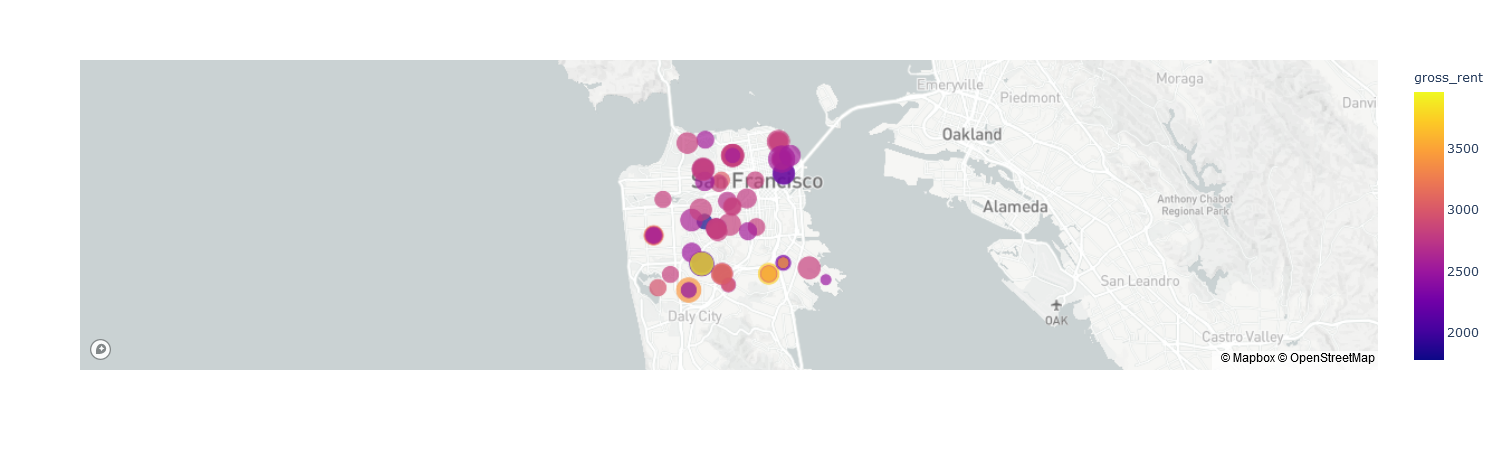

In [246]:
 # Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    sfo_cord_df,
    lat="Lat",
    lon="Lon",
    size = "sale_price_sqr_foot", 
    color="gross_rent",
    zoom = +10
)

map_plot.show()

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [234]:
# Set the mapbox access token
load_dotenv('example.env')
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    sfo_cord_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="Neighborhood",
    zoom=4
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [226]:
# Fetch the data from all expensive neighborhoods per year.
neighborhoods_top_10
df_expensive_neighborhoods_per_year = sfo_avg_neighbrohood_df[sfo_avg_neighbrohood_df["neighborhood"].isin(neighborhoods_top_10)]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


            neighborhood     year  sale_price_sqr_foot  housing_units  \
8  Union Square District  2012.50           903.993258      377427.50   
1         Merced Heights  2014.00           788.844818      380348.00   
2          Miraloma Park  2011.75           779.810842      375967.25   
3        Pacific Heights  2013.00           689.555817      378401.00   
9          Westwood Park  2015.00           687.087575      382295.00   

    gross_rent  
8  2555.166667  
1  3414.000000  
2  2155.250000  
3  2817.285714  
9  3959.000000  


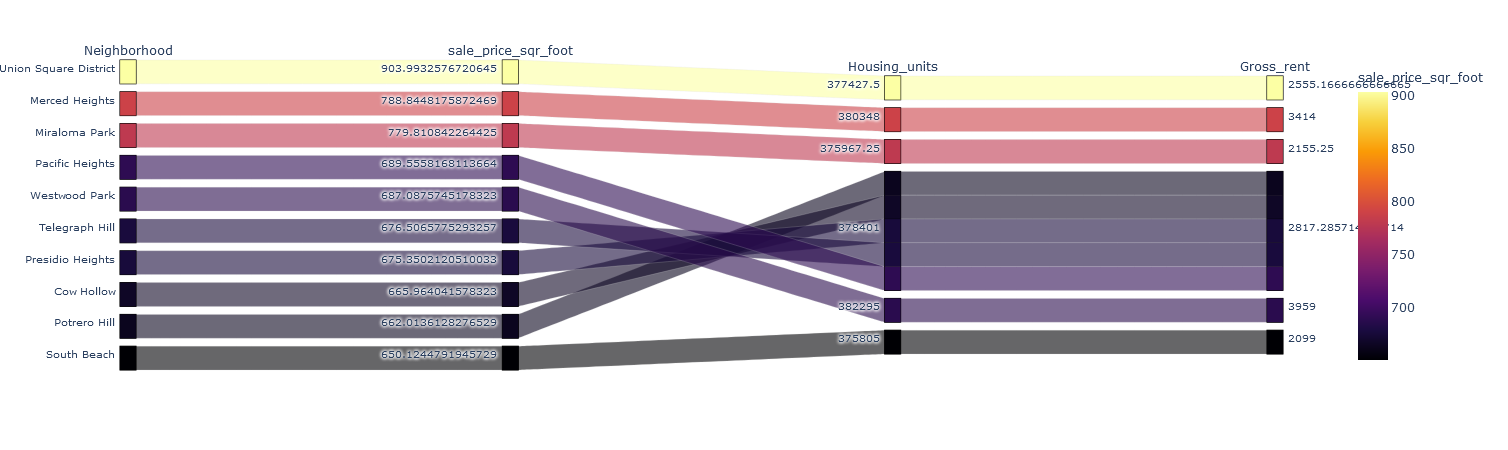

In [244]:
# Parallel Categories Plot
df_top_10 = df_expensive_neighborhoods_per_year.groupby('neighborhood').mean().reset_index().sort_values("sale_price_sqr_foot", ascending=False)
print(df_top_10.head())
px.parallel_categories(
    df_top_10,
    dimensions=["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "housing_units": "Housing_units",
        "gross_rent": "Gross_rent"
    },
    width = 800
)

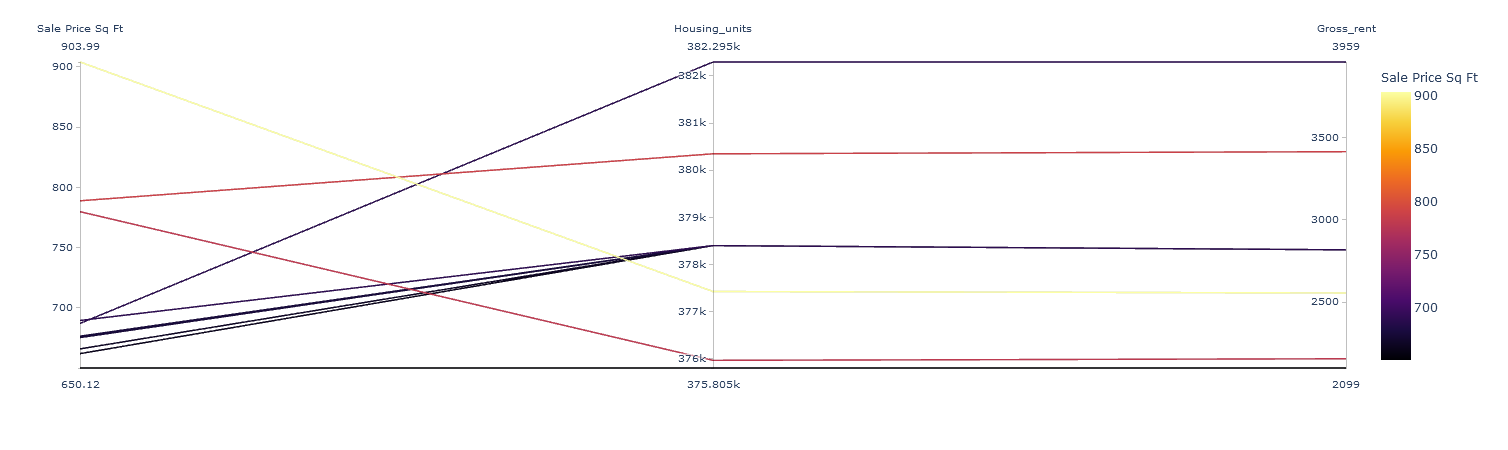

In [228]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    df_top_10,
    dimensions=["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot" : "Sale Price Sq Ft",
        "housing_units": "Housing_units",
        "gross_rent": "Gross_rent"
    },
    width = 800
)


### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

    year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239


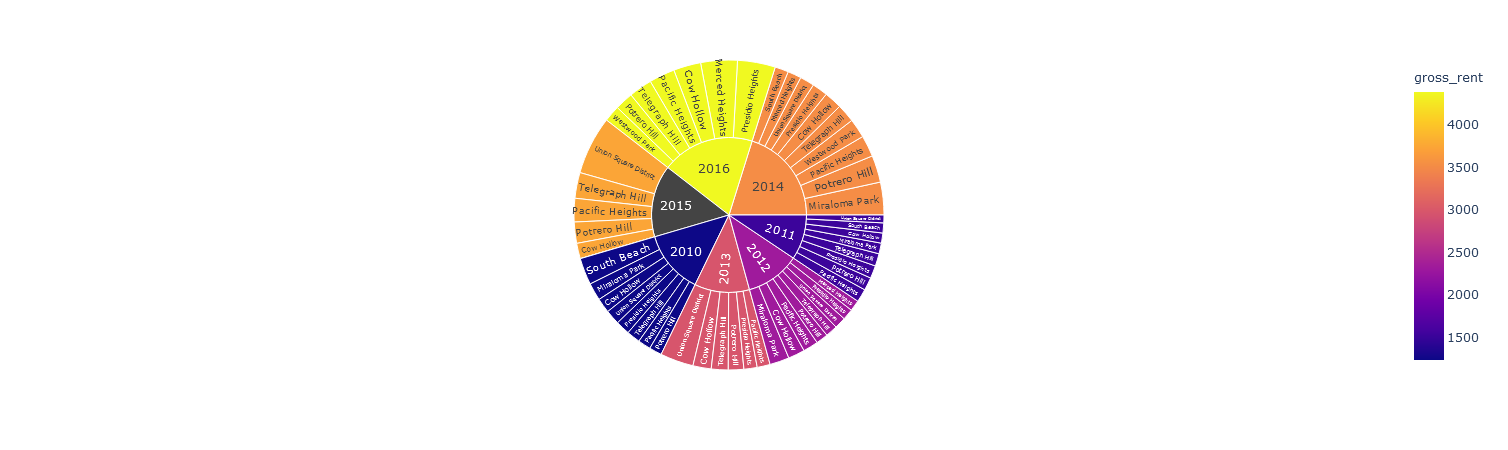

In [229]:
# Sunburst Plot
df_2 = sfo_avg_neighbrohood_df[sfo_avg_neighbrohood_df["neighborhood"].isin(neighborhoods_top_10)]
print(df_2.head())

px.sunburst(
    df_2,
    path=["year","neighborhood"],
    values = "sale_price_sqr_foot",
    color="gross_rent"
    )